In [71]:
#Notebook by Giuseppe Vescina, student number 1783513

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

In [72]:
merged_data = pd.read_csv("../data/merged_data.csv")

In [73]:
merged_data

,borough,good_job,trust,fair_treatment,dealing_issues,quarter,year,year_int,Outcome_A no further action disposal,Outcome_Arrest,...,Outcome_Penalty Notice for Disorder,Outcome_Summons / charged by post,Object of search_Anything to threaten or harm anyone,Object of search_Articles for use in criminal damage,Object of search_Controlled drugs,Object of search_Evidence of offences under the Act,Object of search_Firearms,Object of search_Fireworks,Object of search_Offensive weapons,Object of search_Stolen goods
0,Barking and Dagenham,0.47,0.80,0.66,0.68,1.0,21-22,2021,120.0,17.0,...,0.0,5.0,1.0,0.0,77.0,13.0,0.0,4.0,37.0,13.0
1,Barking and Dagenham,0.44,0.77,0.66,0.64,2.0,21-22,2021,85.0,18.0,...,1.0,1.0,0.0,0.0,76.0,5.0,0.0,1.0,26.0,8.0
2,Barking and Dagenham,0.50,0.78,0.70,0.70,3.0,21-22,2021,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Barking and Dagenham,0.47,0.75,0.70,0.66,1.0,22-23,2022,85.0,26.0,...,0.0,4.0,0.0,0.0,56.0,9.0,0.0,0.0,46.0,20.0
4,Barking and Dagenham,0.50,0.77,0.71,0.66,2.0,22-23,2022,121.0,14.0,...,1.0,2.0,0.0,1.0,80.0,8.0,5.0,2.0,47.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,Westminster,0.51,0.80,0.58,0.60,4.0,21-22,2022,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
348,Westminster,0.59,0.74,0.67,0.65,1.0,23-24,2023,52.0,11.0,...,0.0,0.0,0.0,4.0,23.0,0.0,0.0,0.0,18.0,23.0
349,Westminster,0.59,0.74,0.67,0.65,2.0,23-24,2023,40.0,15.0,...,1.0,0.0,0.0,0.0,11.0,2.0,0.0,0.0,20.0,27.0
350,Westminster,0.60,0.78,0.71,0.67,3.0,23-24,2023,25.0,17.0,...,0.0,0.0,0.0,1.0,13.0,0.0,0.0,1.0,7.0,23.0


In [74]:
# Features and Targets
X = merged_data.drop(['borough', 'good_job', 'trust', 'fair_treatment', 'dealing_issues'], axis=1)
y = merged_data[['good_job', 'trust', 'fair_treatment', 'dealing_issues']]
X = pd.get_dummies(X)

# Normalizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initializing and training the linear regression model , and predicting on test set
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
# Evaluating model 
lr_mse = mean_squared_error(y_test, predictions)
lr_r2 = r2_score(y_test, predictions)
lr_mae = mean_absolute_error(y_test, predictions)
print("Linear Regression")
print("Mean Squared Error:", lr_mse)
print("R2 Score:", lr_r2)
print("Mean Absolute Error:", lr_mae)


Linear Regression
Mean Squared Error: 0.004208275903261477
R2 Score: 0.38529723594411014
Mean Absolute Error: 0.05123064600000641


In [75]:
# Initializing and training the Random Forest Regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicting on the test set
rf_predictions = rf.predict(X_test)

# Evaluating model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)

print("Random Forest")
print("Mean Squared Error:", rf_mse)
print("R2 Score:", rf_r2)
print("Mean Absolute Error:", rf_mae)

Random Forest
Mean Squared Error: 0.004314875265179028
R2 Score: 0.36828663004784234
Mean Absolute Error: 0.05152402099747553


In [76]:
# Initializing the MultiOutputRegressor with GradientBoostingRegressor
multioutput_gbr = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))

# Fitting model and predicting test data
multioutput_gbr.fit(X_train, y_train)
multioutput_predictions = multioutput_gbr.predict(X_test)

# Evaluating the model
gbr_mse = mean_squared_error(y_test, multioutput_predictions)
gbr_r2 = r2_score(y_test, multioutput_predictions)
gbr_mae = mean_absolute_error(y_test, multioutput_predictions)

print("Gradient Boosting")
print("MSE:", gbr_mse)
print("R2 Score:", gbr_r2)
print("MAE:", gbr_mae)

Gradient Boosting
MSE: 0.004430333367026052
R2 Score: 0.35458329047376214
MAE: 0.0530181270429061


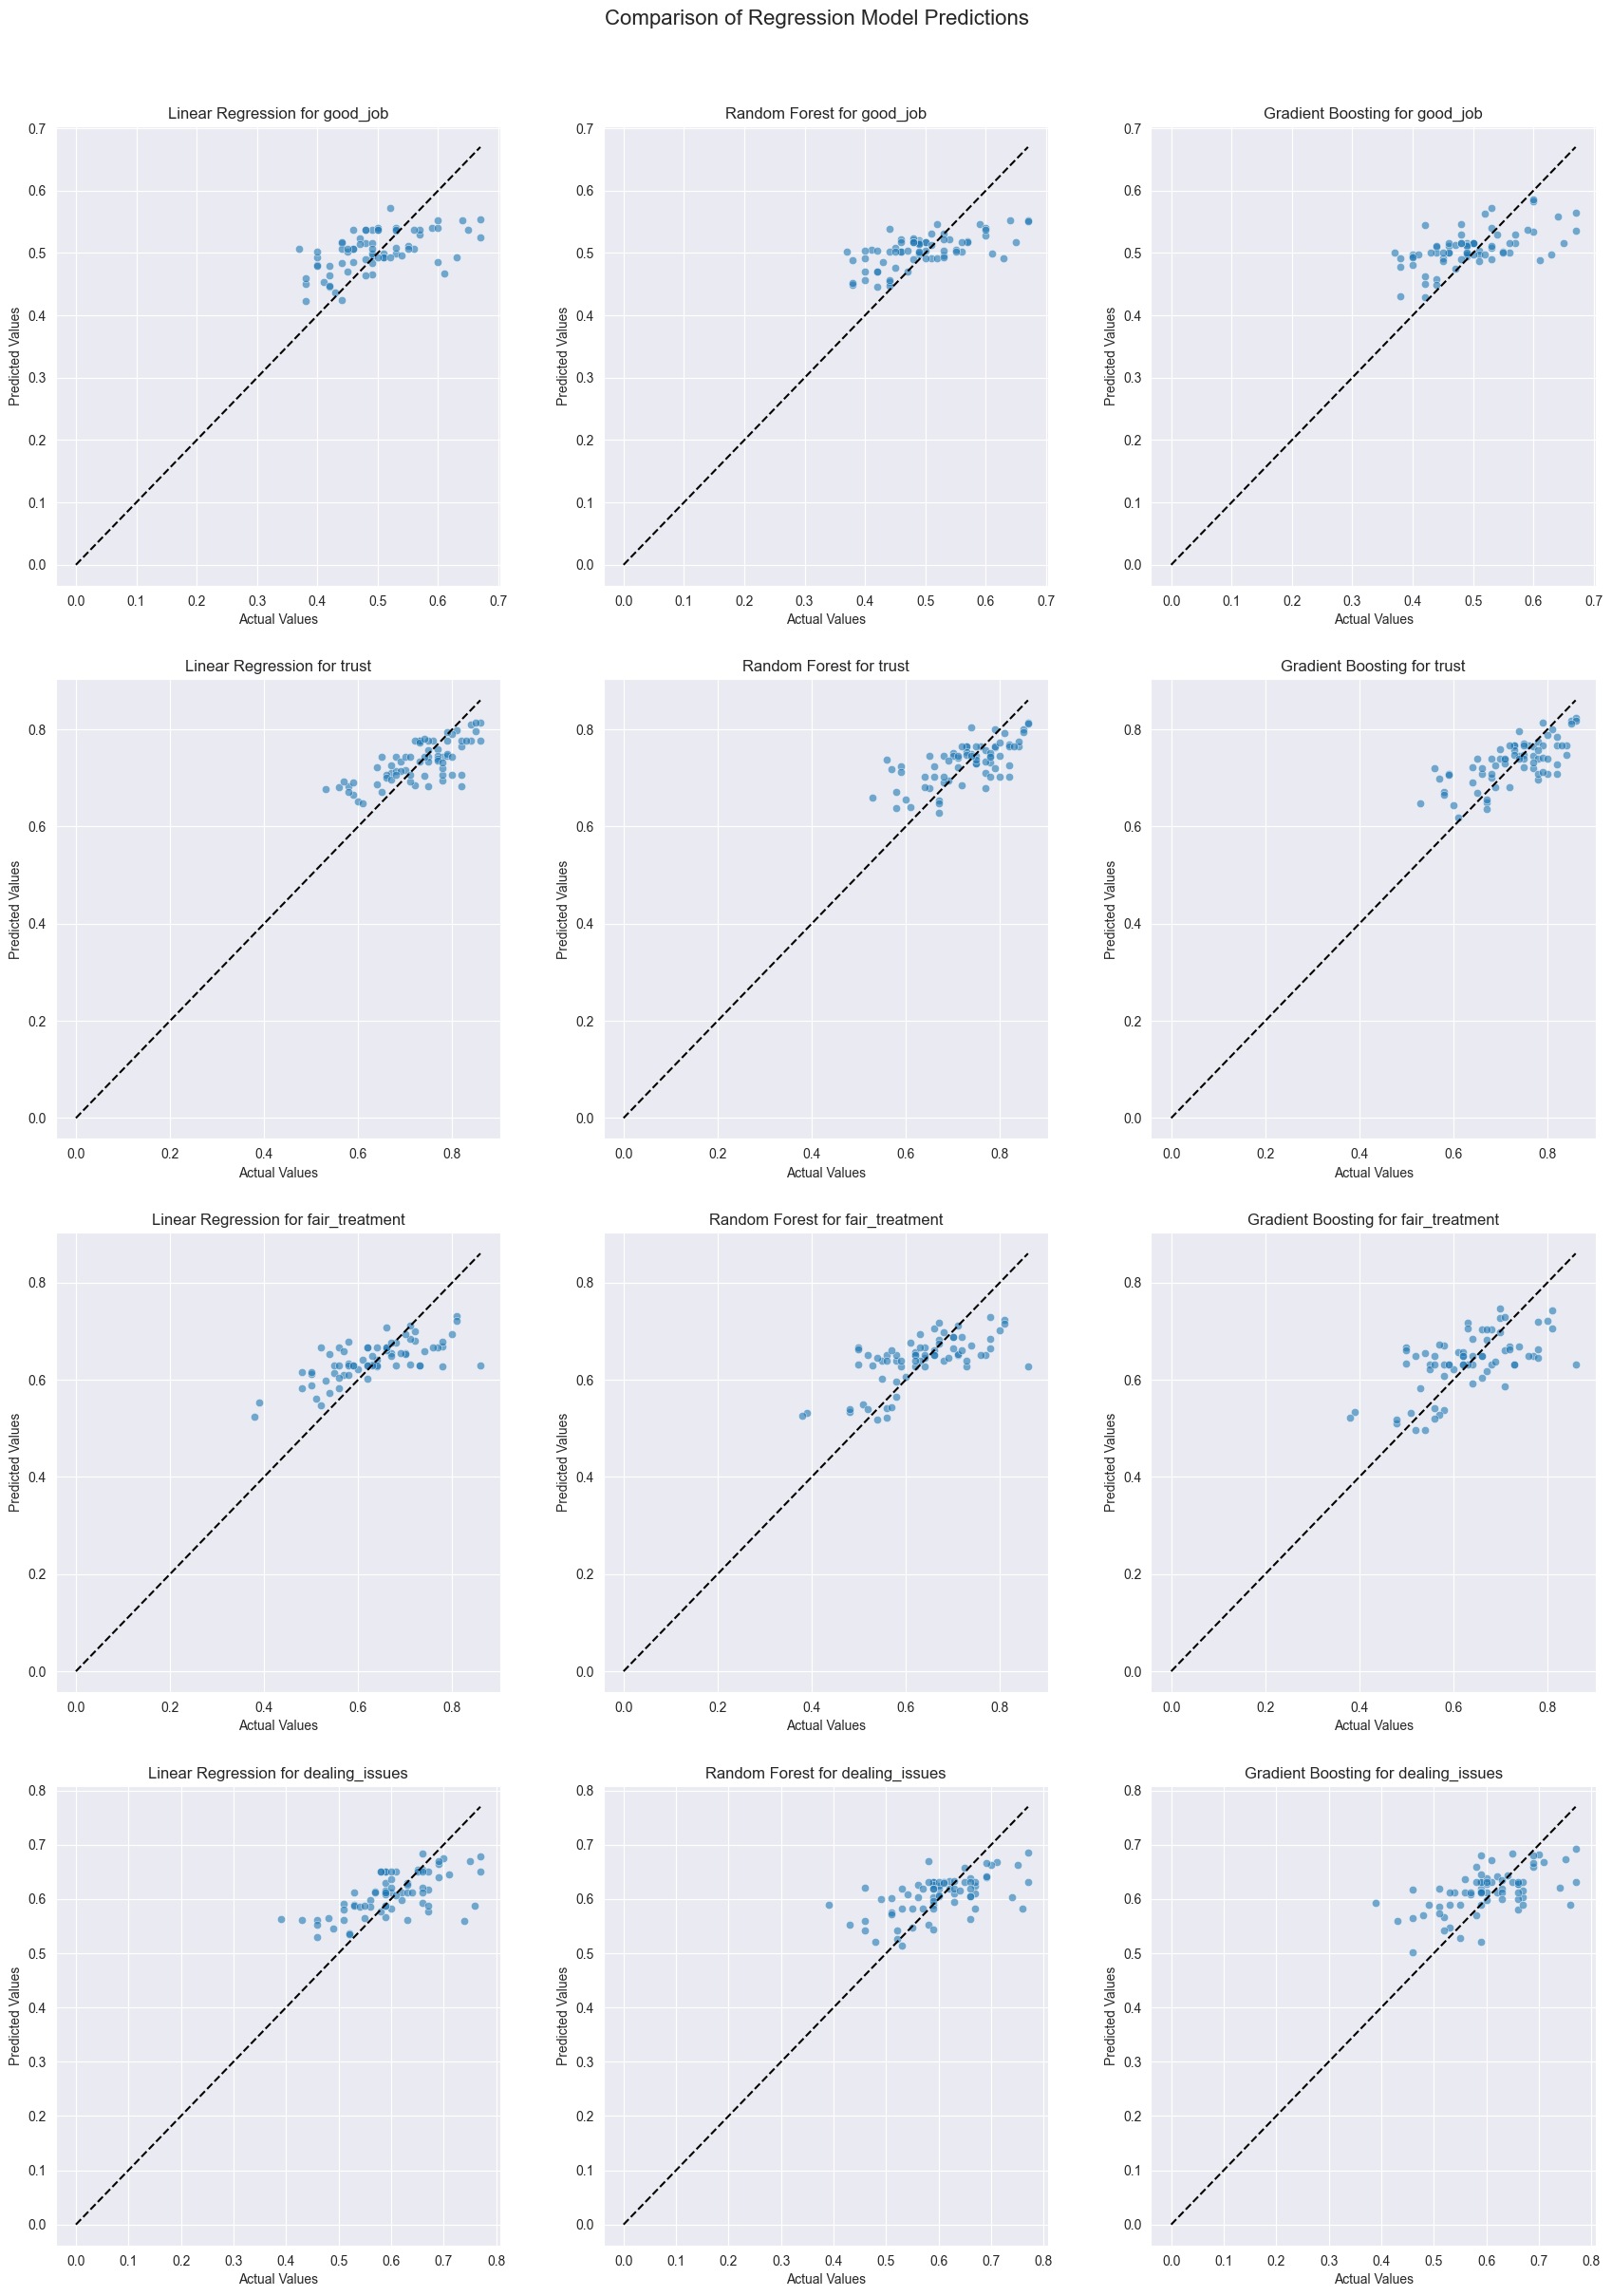

In [77]:
# Create a figure with 4 rows and 3 columns
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 24))
fig.tight_layout(pad=5.0)

# Titles for the models
model_titles = ['Linear Regression', 'Random Forest', 'Gradient Boosting']

# Function to plot on a specific subplot axis
def plot_predictions_subplot(y_true, y_pred, title, ax):
    max_val = max(y_true.max(), y_pred.max())
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.6, ax=ax)
    ax.plot([0, max_val], [0, max_val], '--k') 
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title(title)

# Creating subplots
for i, target in enumerate(['good_job', 'trust', 'fair_treatment', 'dealing_issues']):
    # Linear Regression
    plot_predictions_subplot(y_test.iloc[:, i], predictions[:, i], f'Linear Regression for {target}', axes[i, 0])
    # Random Forest
    plot_predictions_subplot(y_test.iloc[:, i], rf_predictions[:, i], f'Random Forest for {target}', axes[i, 1])
    # Gradient Boosting
    plot_predictions_subplot(y_test.iloc[:, i], multioutput_predictions[:, i], f'Gradient Boosting for {target}', axes[i, 2])

# Adding Title
plt.suptitle('Comparison of Regression Model Predictions', fontsize=16, y=1.02)



plt.show()

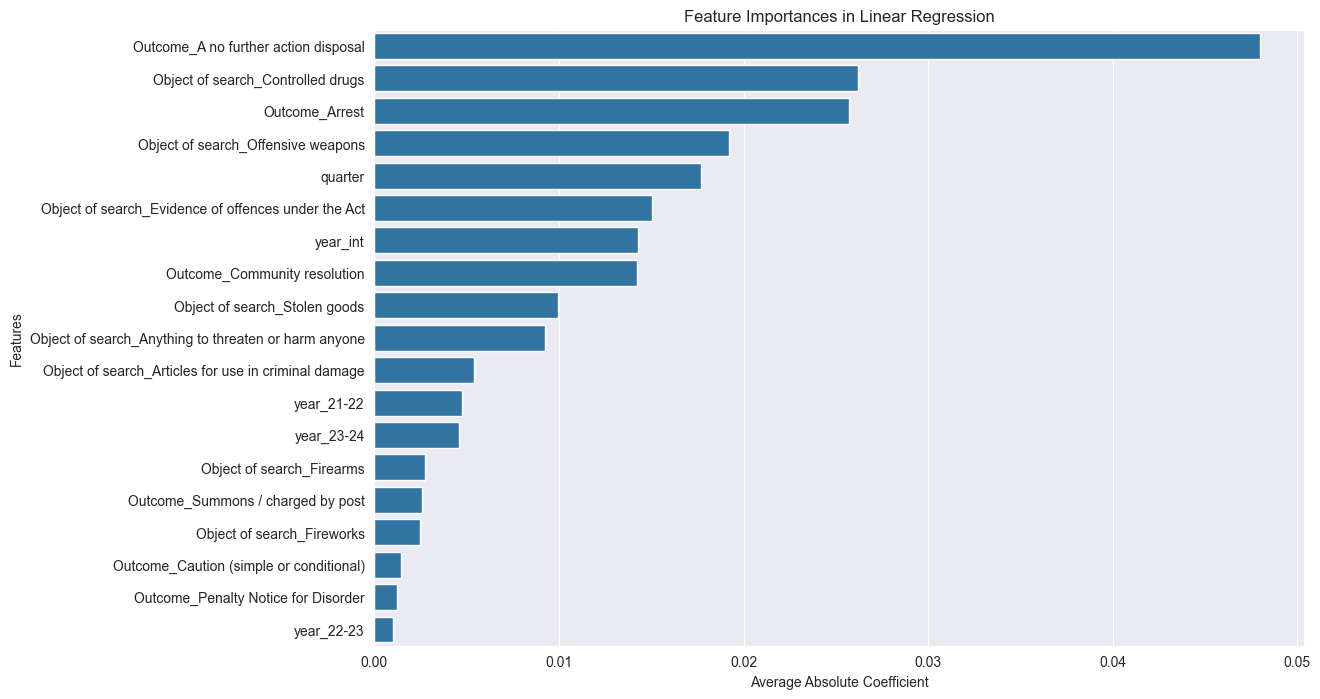

In [78]:
import matplotlib.pyplot as plt

# Assuming 'lr.coef_' holds the coefficients from the linear regression model
# and 'X.columns' are the feature names after processing (e.g., after pd.get_dummies)

# Calculate the average importance of each feature
feature_importance = np.abs(lr.coef_).mean(axis=0)
features = X.columns  # This should correspond to the features in your transformed dataset

# Create a DataFrame for easier handling
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances in Linear Regression')
plt.xlabel('Average Absolute Coefficient')
plt.ylabel('Features')
plt.show()
